# **TikTok Project**

# **Classify videos using machine learning**

# **PACE stages**


## **PACE: Plan**


**Task:**
Build and evaluate a final machine learning model (Random Forest) to classify videos as claims or opinions.

**Key Metric:**
F1 score — to balance precision and recall, minimizing both false positives and false negatives.

**Ethical Considerations:**

- False negatives may let misinformation spread.

- False positives could wrongly suppress opinions, affecting fairness.

**Next Steps:**

- Engineer features and train the random forest model.

- Analyze "banned authors" and their role in claims vs. opinions.

- Evaluate performance and fairness.

- Decide whether to recommend deploying the model.

### **Imports and data loading**

In [3]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

In [4]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

### **Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [5]:
data.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0


In [6]:
# Get number of rows and columns
print(f"There {data.shape[0]} rows and {data.shape[1]} columns in dataset.")

There 19382 rows and 12 columns in dataset.


In [7]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [8]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [9]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [10]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [11]:
# Drop rows with missing values
data = data.dropna()

In [12]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [13]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [15]:
### Check for and handle outliers.
numerical_cols = [
    'video_duration_sec',
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count'
]

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].astype(float)

    data.loc[data[col] < lower_bound, col] = lower_bound
    data.loc[data[col] > upper_bound, col] = upper_bound

In [16]:
# Check class balance
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

## **PACE: Construct**

### **Feature engineering**

In [17]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['transcription_length'] = data['video_transcription_text'].str.len()

In [18]:
# Calculate the average text_length for claims and opinions
data.groupby(['claim_status'])['transcription_length'].mean()

claim_status
claim      95.376978
opinion    82.722562
Name: transcription_length, dtype: float64

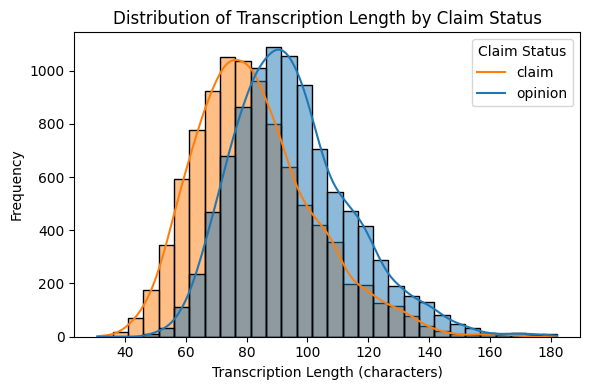

In [22]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='transcription_length', hue='claim_status', kde=True, bins=30)
plt.title('Distribution of Transcription Length by Claim Status')
plt.xlabel('Transcription Length (characters)')
plt.ylabel('Frequency')
plt.legend(title='Claim Status', labels=data['claim_status'].unique())
plt.tight_layout()
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [23]:
# Create a copy of the X data
X = data.copy()

# Drop unnecessary columns
X = X.drop(columns=['claim_status', 'video_id', '#', 'video_transcription_text'])

# Encode target variable
y = data['claim_status'].map({'claim': 1, 'opinion': 0})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)

### **Split the data**

In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: claim_status, dtype: int64

In [26]:
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296,19425,241,1,0,97,0,0,1
1,32,140877,77355,19034,1161,684,107,0,0,0
2,31,902185,97690,2858,833,329,137,0,0,0
3,25,437506,239954,34812,1234,584,131,0,0,0
4,19,56167,34987,4110,547,152,128,0,0,0


#### **Create train/validate/test sets**

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [28]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [29]:
# Get shape of each training, validation, and testing set
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation features shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (11450, 10)
Training labels shape: (11450,)
Validation features shape: (3817, 10)
Validation labels shape: (3817,)
Test features shape: (3817, 10)
Test labels shape: (3817,)


### **Build models**


### **Build a random forest model**

In [30]:
# Instantiate the random forest classifier
RFC = RandomForestClassifier(random_state=42)

# Dictionary of hyperparameters to tune
param_grid = {'n_estimators' : [20, 50, 100], 
              'max_depth' : [5, 10, 50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# Define a list of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
# Instantiate the GridSearchCV object
RFC_cv = GridSearchCV(RFC, param_grid, scoring=scoring, cv=5, refit='f1')

In [31]:
%%time
RFC_cv.fit(X_train, y_train)

CPU times: user 1min 8s, sys: 6.07 s, total: 1min 14s
Wall time: 1min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [20, 50, 100]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [32]:
# Examine best recall score
RFC_cv.best_estimator_

RandomForestClassifier(max_depth=5, max_samples=0.9, min_samples_split=0.01,
                       n_estimators=20, random_state=42)

In [33]:
# Examine best parameters
RFC_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 20}

Let's check the precision score to make sure the model isn't labeling everything as claims. We can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [34]:
# Access the GridSearch results and convert it to a pandas df
results_df = pd.DataFrame(RFC_cv.cv_results_)
             
# Examine the GridSearch results df at column `mean_test_precision` in the best index
# Get the precision score at the best index
best_index = RFC_cv.best_index_

best_precision = results_df.loc[best_index, 'mean_test_precision']
best_recall = results_df.loc[best_index, 'mean_test_recall']

print("Precision of the best model:", best_precision)
print("Recall of the best model:", best_recall)

Precision of the best model: 0.99947826008123
Recall of the best model: 0.9908590937490702


The model performs exceptionally well:

- Precision: 0.9995 — almost all predicted claims are correct.

- Recall: 0.9909 — nearly all actual claims are identified.

### **Build an XGBoost model**

In [37]:
# Instantiate the XGBoost classifier
XGB = XGBClassifier(objective='binary:logistic', random_state=0) 

# Dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.01, 0.1, 0.2, 0.3],
             'n_estimators': [20, 75, 100, 125, 200, 300]
             }  

# Define a list of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Instantiate the GridSearchCV object
XGB_cv = GridSearchCV(XGB, cv_params, scoring=scoring, cv=5, refit='f1')

In [38]:
%%time
XGB_cv.fit(X_train, y_train)

CPU times: user 7min 24s, sys: 11min 55s, total: 19min 20s
Wall time: 8min 54s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 75, 100, 125, 200, 300]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [39]:
results_df = pd.DataFrame(XGB_cv.cv_results_)
             
# Examine the GridSearch results df at column `mean_test_precision` in the best index
# Get the precision score at the best index
best_index = XGB_cv.best_index_

best_precision = results_df.loc[best_index, 'mean_test_precision']
best_recall = results_df.loc[best_index, 'mean_test_recall']

print("Precision of the best model:", best_precision)
print("Recall of the best model:", best_recall)

Precision of the best model: 0.9996521739130435
Recall of the best model: 0.9905145636845081


In [40]:
# Let's examine best parameters
XGB_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 100}

The XGBoost model performs exceptionally well:

- Precision: 0.9997 — almost all predicted claims are correct.
- Recall: 0.9902 — nearly all actual claims are identified.

## **PACE: Execute**

### **Evaluate model**

#### **Random forest**

In [41]:
# Use the random forest "best estimator" model to get predictions on the validation set
RFC_model = RFC_cv.best_estimator_
y_pred_rfc = RFC_model.predict(X_val)

In [42]:
# Display the predictions on the validation set
y_pred_rfc

array([1, 0, 0, ..., 0, 0, 1], shape=(3817,))

In [43]:
# Display the true labels of the validation set
y_val.values

array([1, 0, 0, ..., 0, 0, 1], shape=(3817,))

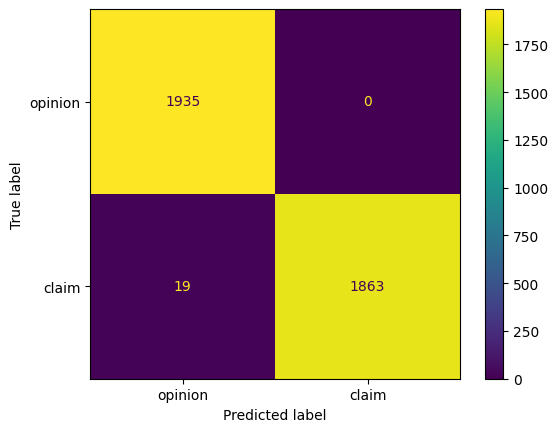

In [44]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred_rfc)

# Create display of confusion matrix using ConfusionMatrixDisplay()
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['opinion', 'claim'])

# Plot confusion matrix
cm_display.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [45]:
# Create a classification report
# Create classification report for random forest model
report_rfc = classification_report(y_val, y_pred_rfc)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Classification Report Analysis:**

Class 0 (Opinion):

- Precision: 0.99 — 99% of predicted non-claims are correct.

- Recall: 1.00 — The model correctly identifies all actual non-claims.

- F1-score: 1.00 — A perfect balance between precision and recall for non-claims.

Class 1 (Claim):

- Precision: 1.00 — 100% of predicted claims are correct.

- Recall: 0.99 — The model correctly identifies 99% of actual claims.

- F1-score: 0.99 — High precision and recall balance for claims.

Overall Performance:

- Accuracy: 1.00 — 100% of predictions are correct.

- Macro Average: 1.00 — A perfect average of precision, recall, and F1-score across both classes.

- Weighted Average: 1.00 — Weighted metrics based on class support, still perfect.

#### **XGBoost**

Now, let's evaluate the XGBoost model on the validation set.

In [46]:
# Use the best estimator to predict on the validation data
XGB_model = XGB_cv.best_estimator_
y_pred_xgb = XGB_model.predict(X_val)

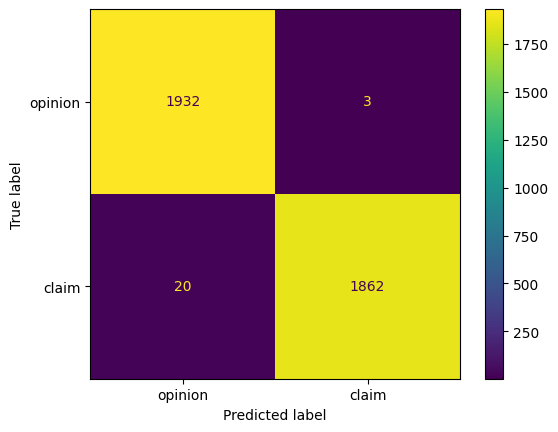

In [47]:
# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred_xgb)

# Create display of confusion matrix using ConfusionMatrixDisplay()
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['opinion', 'claim'])

# Plot confusion matrix
cm_display.plot()

# Display plot
plt.show()

In [56]:
# Create a classification report
report_xgb = classification_report(y_val, y_pred_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1935
           1       1.00      0.99      0.99      1882

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**XGBoost Model Results:**

Precision:

- Class 0 (non-claim): 0.99

- Class 1 (claim): 1.00
→ The model is highly accurate when predicting both classes.

Recall:

- Class 0: 1.00 — All non-claims are correctly identified.

- Class 1: 0.99 — Nearly all claims are identified, with very few missed.

F1-score:
- 0.99 for both classes, indicating a strong balance between precision and recall.

Overall Accuracy:
- 0.99 — Slightly below 100%, still excellent.

#### Comparison to Random Forest:

In [53]:
# Generate classification reports as dicts
rfc_report = classification_report(y_val, y_pred_rfc, output_dict=True)
xgb_report = classification_report(y_val, y_pred_xgb, output_dict=True)

# Create a comparison dictionary
comparison_dict = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Random Forest': [
        round(rfc_report['accuracy'], 2),
        round(rfc_report['1']['precision'], 2),
        round(rfc_report['1']['recall'], 2),
        round(rfc_report['1']['f1-score'], 2)
    ],
    'XGBoost': [
        round(xgb_report['accuracy'], 2),
        round(xgb_report['1']['precision'], 2),
        round(xgb_report['1']['recall'], 2),
        round(xgb_report['1']['f1-score'], 2)
    ]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_dict)

# Display
print(comparison_df)

      Metric  Random Forest  XGBoost
0   Accuracy           1.00     0.99
1  Precision           1.00     1.00
2     Recall           0.99     0.99
3   F1-score           0.99     0.99


### **Use champion model to predict on test data**

The random forest performed a little bit better, so it is the champion model.

In [49]:
y_pred = RFC_model.predict(X_test)

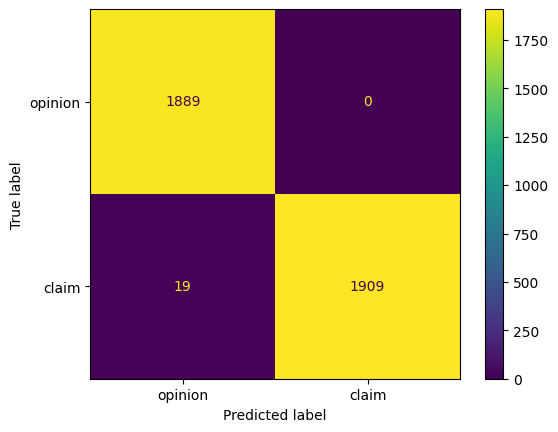

In [50]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix using ConfusionMatrixDisplay()
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['opinion', 'claim'])

# Plot confusion matrix
cm_display.plot()

# Display plot
plt.show()

#### **Feature importances of champion model**


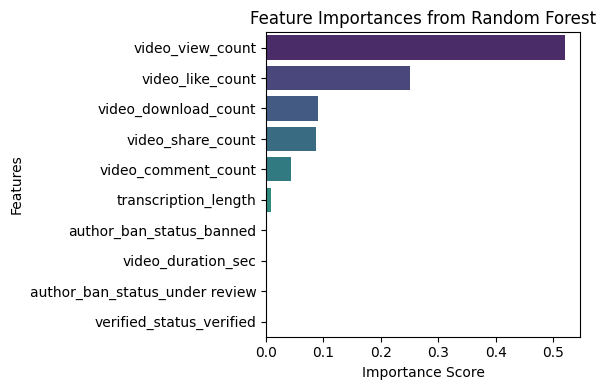

In [52]:
importances = pd.Series(RFC_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=importances.index, hue=importances.index, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**Most Predictive Features:**

- video_view_count — 52.1% importance

- video_like_count — 25.0%

- video_download_count — 9.1%

- video_share_count — 8.7%

- video_comment_count — 4.3%

These five features together contribute over 99% of the model’s predictive power.

**Least Predictive Features:**

- verified_status_verified, author_ban_status_under review, video_duration_sec all had negligible importance.

### **Conclusion**

The model is highly effective, with strong performance in precision and recall, making it suitable for distinguishing between claims and opinions. It relies heavily on engagement metrics such as views, likes, and shares to make predictions, showing that the popularity of content is a strong indicator. New features like keyword presence, sentiment analysis, or TF-IDF representations from the transcription text could improve model performance. Additionally, incorporating features related to user credibility, content topics, or more advanced text analysis could enhance the model's predictive power.